# Trade sign autocorrelation plot

In [1]:
# Import modules

from matplotlib import pyplot as plt
import os

import pickle

%matplotlib inline

In [6]:
def trade_sign_autocorrelation_plot(ticker_i, days, t_step):
    """
    Plot the trade sign autocorrelation during an interval of time (days) in
    independent plots in a figure. The data is loaded from the trade sign
    autocorrelation data results.
        :param ticker_i: string of the abbreviation of the trade sign stock to
         be analized (i.e. 'AAPL')
        :param days: string with the days to be analized
         (i.e ['07', '08', '09'])
        :param t_step: time step in the data in ms
    """

    plt.figure(figsize=(9, 16))
    plt.subplots_adjust(hspace=0, wspace=0)

    for i, day in enumerate(days):

        print('Processing data for the stock ' + ticker_i + ' the day '
              + day + ' March, 2016')

        plot = pickle.load(open("".join((
         '../Data/trade_sign_autocorrelation_data_{}ms/trade_sign_'
         + 'autocorrelation_201603{}_{}i_{}ms.pickl').split())
         .format(t_step, day, ticker_i, t_step), 'rb'))

        plt.subplot(len(days), 1, i+1)
        plt.semilogx(plot, '-g', label='Stock i {} - Day {}'
                     .format(ticker_i, day))
        plt.xlabel(r'Time lag $[\tau]$')
        plt.ylabel(r'Trade sign autocorrelation')
        plt.legend(loc='best')
        plt.title(
            'Trade sign autocorrelation - ticker i {} - {}ms'
            .format(ticker_i, t_step))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        plt.grid(True)
        plt.tight_layout()

    if (not os.path.isdir('../Data/trade_sign_autocorrelation_plot_{}ms/'
                          .format(t_step))):
        os.mkdir('../Data/trade_sign_autocorrelation_plot_{}ms/'
                 .format(t_step))
        print('Folder to save plot created')

    plt.savefig("".join((
        '../Data/trade_sign_autocorrelation_plot_{}ms/trade_sign_'
        + 'autocorrelation__{}_{}ms.png').split())
        .format(t_step, ticker_i, t_step))

    return None


In [7]:
# Using the AAPL stock
ticker_i = 'AAPL'
days = ['07', '08', '09', '10', '11']
tau_val = 1000
t_step = 1000

Processing data for the stock AAPL the day 07 March, 2016
Processing data for the stock AAPL the day 08 March, 2016
Processing data for the stock AAPL the day 09 March, 2016
Processing data for the stock AAPL the day 10 March, 2016
Processing data for the stock AAPL the day 11 March, 2016
Folder to save plot created


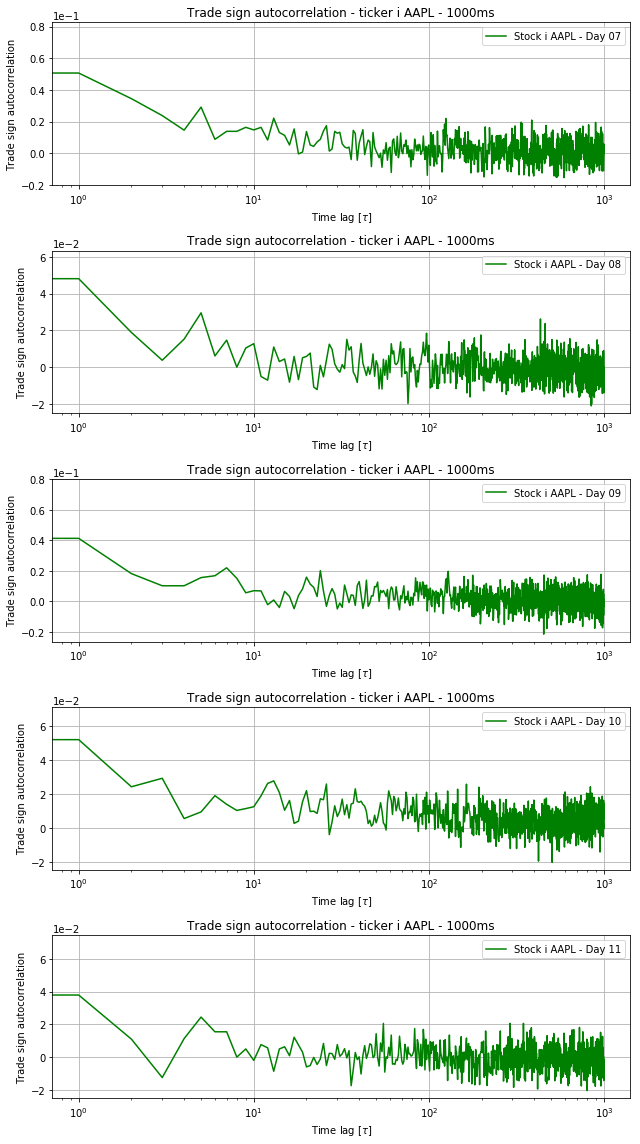

In [8]:
trade_sign_autocorrelation_plot(ticker_i, days, t_step)